<a href="https://colab.research.google.com/github/visith1577/Machine-learning-first-projects/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torchvision
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
import torchvision.transforms as transforms

In [2]:
train_dataset = torchvision.datasets.MNIST(root='.', 
                                           train=True, 
                                           download=True,
                                          transform = transforms.ToTensor())

In [3]:
train_dataset.data.max()

tensor(255, dtype=torch.uint8)

In [4]:
train_dataset.data.min()

tensor(0, dtype=torch.uint8)

In [5]:
train_dataset.data.shape

torch.Size([60000, 28, 28])

In [6]:
test_dataset = torchvision.datasets.MNIST(root='.',
                                          train = False,
                                          download = True,
                                          transform = transforms.ToTensor())

In [7]:
test_dataset.data.shape

torch.Size([10000, 28, 28])

In [8]:
K = len(set(train_dataset.targets.numpy()))
print('No. f classes:' ,K)

No. f classes: 10


In [51]:
#making the model
model = nn.Sequential(
    nn.Linear(784, 128),
    nn.ReLU(),
    nn.Linear(128, 64),
    nn.ReLU(),
    nn.Linear(64, 32),
    nn.ReLU(),
    nn.Linear(32, 10)
)

In [52]:
device = torch.device('cuda:0' if torch.cuda.is_available else 'cpu')
print(device)

cuda:0


In [53]:
model.to(device)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=10, bias=True)
)

In [54]:
lr = 0.0001

In [60]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=lr, momentum=0.99)

In [61]:
batch_size = 32

train_loader = torch.utils.data.DataLoader(
    train_dataset,
    batch_size,
    shuffle=True
)

test_loader = torch.utils.data.DataLoader(
    test_dataset,
    batch_size
)

In [62]:
from datetime import datetime

In [63]:
def batch_gd(model, criterion, optimizer, train_loader, test_loader, epochs):
  train_losses = np.zeros(epochs)
  test_losses = np.zeros(epochs)

  for it in range(epochs):
    model.train()
    t0 = datetime.now()
    train_loss = []
    for inputs, targets in train_loader:
      
      inputs, targets = inputs.to(device), targets.to(device)


      inputs = inputs.view(-1, 784)

      
      optimizer.zero_grad()

      
      outputs = model(inputs)
      loss = criterion(outputs, targets)
        
      
      loss.backward()
      optimizer.step()

      train_loss.append(loss.item())

    
    train_loss = np.mean(train_loss) 
    
    model.eval()
    test_loss = []
    for inputs, targets in test_loader:
      inputs, targets = inputs.to(device), targets.to(device)
      inputs = inputs.view(-1, 784)
      outputs = model(inputs)
      loss = criterion(outputs, targets)
      test_loss.append(loss.item())
    test_loss = np.mean(test_loss)

    # Save losses
    train_losses[it] = train_loss
    test_losses[it] = test_loss
    
    dt = datetime.now() - t0
    print(f'Epoch {it+1}/{epochs}, Train Loss: {train_loss:.4f}, \
      Test Loss: {test_loss:.4f}, Duration: {dt}')
  
  return train_losses, test_losses

In [64]:
train_losses, test_losses  = batch_gd(model, criterion, optimizer, train_loader, test_loader, 20)

Epoch 1/20, Train Loss: 1.9634,       Test Loss: 0.9176, Duration: 0:00:08.314988
Epoch 2/20, Train Loss: 0.5732,       Test Loss: 0.4000, Duration: 0:00:08.795062
Epoch 3/20, Train Loss: 0.3615,       Test Loss: 0.3110, Duration: 0:00:08.650475
Epoch 4/20, Train Loss: 0.2912,       Test Loss: 0.2567, Duration: 0:00:08.552349
Epoch 5/20, Train Loss: 0.2427,       Test Loss: 0.2174, Duration: 0:00:08.619288
Epoch 6/20, Train Loss: 0.2047,       Test Loss: 0.1854, Duration: 0:00:08.926956
Epoch 7/20, Train Loss: 0.1762,       Test Loss: 0.1663, Duration: 0:00:08.431830
Epoch 8/20, Train Loss: 0.1543,       Test Loss: 0.1557, Duration: 0:00:08.365860
Epoch 9/20, Train Loss: 0.1365,       Test Loss: 0.1333, Duration: 0:00:08.692428
Epoch 10/20, Train Loss: 0.1228,       Test Loss: 0.1270, Duration: 0:00:08.758760
Epoch 11/20, Train Loss: 0.1105,       Test Loss: 0.1261, Duration: 0:00:08.696930
Epoch 12/20, Train Loss: 0.1012,       Test Loss: 0.1117, Duration: 0:00:08.665828
Epoch 13/20, 

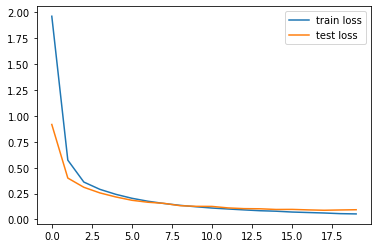

In [65]:
# Plot the train loss and test loss per iteration
plt.plot(train_losses, label='train loss')
plt.plot(test_losses, label='test loss')
plt.legend()
plt.show()

In [66]:
n_correct = 0.
n_total = 0.
for inputs, targets in train_loader:
  # move data to GPU
  inputs, targets = inputs.to(device), targets.to(device)

  # reshape the input
  inputs = inputs.view(-1, 784)

  # Forward pass
  outputs = model(inputs)

  # Get prediction
  # torch.max returns both max and argmax
  _, predictions = torch.max(outputs, 1)
  
  # update counts
  n_correct += (predictions == targets).sum().item()
  n_total += targets.shape[0]

train_acc = n_correct / n_total


n_correct = 0.
n_total = 0.
for inputs, targets in test_loader:
  # move data to GPU
  inputs, targets = inputs.to(device), targets.to(device)

  # reshape the input
  inputs = inputs.view(-1, 784)

  # Forward pass
  outputs = model(inputs)

  # Get prediction
  # torch.max returns both max and argmax
  _, predictions = torch.max(outputs, 1)
  
  # update counts
  n_correct += (predictions == targets).sum().item()
  n_total += targets.shape[0]

test_acc = n_correct / n_total
print(f"Train acc: {train_acc:.4f}, Test acc: {test_acc:.4f}")

Train acc: 0.9851, Test acc: 0.9709
